# get $\Delta \rho $ for differents grids

In [23]:
import numpy as np
import sys 
import os
import shutil
import matplotlib.pyplot as plt
import scipy.interpolate as sp
import ipyvolume as ipv
sys.path.append('/home/giorgiod/Documents/APDFT/dep')
sys.path.append('/home/giorgiod/Documents/APDFT/src')

In [24]:
from apdft import Calculator

In [25]:
proj_path='/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/'
os.listdir(proj_path)

['def2-QZVPP',
 'LiNa_fixed_scf',
 '631G*',
 'def2-TZVP',
 'sto3G',
 'sto6G',
 '321G',
 'cc-pVTZ',
 'aug-cc-pVQZ',
 'LiNa-def2TZVP-rerun']

In [26]:
basisSets=[ 'def2-TZVP','def2-QZVPP','aug-ccpVQZ', 'sto3G', 'sto6G', '321G','631G*','cc-pVTZ']
molecules=['NN','CO','BF','BeNe','LiNa','HeMg','HAl']
alchemy=[-2,-1,0,1,2]
points= np.linspace(1.30,3.20,20)
def dirName(basis_set,molecule,point,alchemy=0):
    return proj_path+basis_set+'/'+molecule+"/A{}_Radius:{}".format(alchemy,str(point)[0:3])+'/'

In [27]:
def parse_energy_cc(log_file):
    """Parse the couple cluster energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "Final results:" in line:
                    good_line=logf.readline()
                    if "Total CCSD energy" in good_line:
                        for x in good_line.split(' '):
                            try:
                                float(x)
                                return (float(x))
                            except:
                                pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [28]:
def energy(bs,mol,pt,al=0):
    return parse_energy_cc(dirName(bs,mol,pt,al)+'run.log')

In [29]:
def get_grid(basis_set,molecule,point,alchemy=0):
    return (Calculator.MrccCalculator.get_grid(None, None, dirName(basis_set,molecule,point,alchemy=0)))

In [30]:
def get_ccdensity(basis_set,molecule,point,alchemy=0):
    return Calculator.MrccCalculator.density_on_grid(dirName(basis_set,molecule,point,alchemy=0)+'DENSITY',get_grid(basis_set,molecule,point,alchemy=0)[0])

In [31]:
def get_grid(basis_set,molecule,point,alchemy=0):
    return (Calculator.MrccCalculator.get_grid(None, None, dirName(basis_set,molecule,point,alchemy=0)))
def get_ccdensity(basis_set,molecule,point,alchemy=0):

    return Calculator.MrccCalculator.density_on_grid(dirName(basis_set,molecule,point,alchemy=0)+'DENSITY',get_grid(basis_set,molecule,point,alchemy=0)[0])
gnn,wnn=get_grid('sto3G','NN',2.3)[0],get_grid('sto3G','NN',2.3)[1]
dnn=get_ccdensity('sto3G','NN',2.3)
gbne,wbne=get_grid('sto3G','BeNe',2.3)[0],get_grid('sto3G','BeNe',2.3)[1]
dbne=get_ccdensity('sto3G','BeNe',2.3)

def Colour(a):
    colour=[]
    mina=min(a)
    maxa=max(a)
    for i in range (len(a)):
        colour.append((((a[i]-mina)/(maxa-mina))**0.5*256,0,0))#((maxa-dw[i])/(maxa-mina))**0.5*256))
        #colour.append((256,0,0))
    return colour
#ipv.quickscatter(gbne[:,0],gbne[:,1],gbne[:,2],size=0.05,color=Colour(dbne))
#ipv.show()

In [32]:
import numpy as np
import scipy
import scipy.ndimage as snd
import matplotlib.pyplot as plt

In [33]:
a=scipy.interpolate.griddata(gbne[:],dbne[:],gnn[:],method='nearest')
b=scipy.interpolate.griddata(gnn[:],a[:],gbne[:],method='nearest')
print(np.sum(wbne*dbne))
print(np.sum(wnn*a))
print(np.sum(wbne*b))
print(np.sum(wnn*abs(a-dnn))/np.sum(wnn*a)*14)
print(np.sum(wbne*(dbne-b)))

#ipv.quickscatter(gnn[:,0],gnn[:,1],gnn[:,2],size=0.05,color=Colour(abs(a-dnn)))
#ipv.show()

13.999998443815755
14.000487120251636
13.999022401627077
9.258590291895935
0.0009760421886811385


In [34]:
a=scipy.interpolate.griddata(gnn[:],dnn[:],gbne[:],method='nearest')
a =a/np.sum(wbne*a)*14
#b=scipy.interpolate.griddata(gnn[:],a[:],gbne[:],method='nearest')
#print(np.sum(wbne*dbne))
print(np.sum(wbne*a))
#print(np.sum(wbne*b))
print(np.sum(wbne*abs(a-dbne)))
#print(np.sum(wbne*(dbne-b)))

14.000000000000002
9.435371250944442


In [35]:
# method='linear' didn't work , memory problem???
print ('grid points 1st grid=', gbne.shape)
print ('grid points 2nd grid=', gnn.shape)
"""
%time
a=scipy.interpolate.griddata(gbne[:1000],dbne[:1000],gnn[:1000],method='linear')
%time
a=scipy.interpolate.griddata(gbne[:10000],dbne[:10000],gnn[:10000],method='linear')
%time
a=scipy.interpolate.griddata(gbne[:20000],dbne[:20000],gnn[:20000],method='linear')
%time
"""
###seems not hard,though 
"""
a=scipy.interpolate.griddata(gbne[:gnn.shape[0]],dbne[:gnn.shape[0]],gnn,method='linear')
print(np.sum(wbne*dbne))
print(np.sum(wnn*a))
print(np.sum(wnn*abs(a-dnn)))
## outputs nan
grid points 1st grid= (90806, 3)
grid points 2nd grid= (58072, 3)
13.999998443815755
nan
nan
\
"""
##better use method='nearest'

grid points 1st grid= (90806, 3)
grid points 2nd grid= (58072, 3)


"\na=scipy.interpolate.griddata(gbne[:gnn.shape[0]],dbne[:gnn.shape[0]],gnn,method='linear')\nprint(np.sum(wbne*dbne))\nprint(np.sum(wnn*a))\nprint(np.sum(wnn*abs(a-dnn)))\n## outputs nan\ngrid points 1st grid= (90806, 3)\ngrid points 2nd grid= (58072, 3)\n13.999998443815755\nnan\nnan\n"

In [36]:
def delta_Rho(bs,dist,mol1,mol2): 
    gg1=get_grid(bs,mol1,dist)
    g1,w1=gg1[0],gg1[1]
    gg2=get_grid(bs,mol2,dist)
    g2,w2=gg2[0],gg2[1]    
    d1=get_ccdensity(bs,mol1,dist)
    d2=get_ccdensity(bs,mol2,dist)
    p1_2=scipy.interpolate.griddata(g1[:],d1[:],g2[:],method='nearest')
    #print(np.sum(w2*abs(p1_2-d2)))
    p2_1=scipy.interpolate.griddata(g2[:],d2[:],g1[:],method='nearest')
    #print(np.sum(w1*abs(p2_1-d1)))
    return (np.sum(w1*abs(p2_1-d1))+np.sum(w2*abs(p1_2-d2)))/2

In [37]:
%time delta_Rho('aug-cc-pVQZ',3.0,'CO','NN')

CPU times: user 215 ms, sys: 12.5 ms, total: 227 ms
Wall time: 235 ms


3.0693181594717016

In [38]:
import pandas as pd
basisSets

['def2-TZVP',
 'def2-QZVPP',
 'aug-ccpVQZ',
 'sto3G',
 'sto6G',
 '321G',
 '631G*',
 'cc-pVTZ']

In [39]:
"""
q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('sto3G',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_sto3G=pd.DataFrame(q)   
"""

"\nq=[]\nfor x in range(6):\n    m1=molecules[x]\n    for y in range(x+1,7):\n        m2=molecules[y]\n        for d in points:\n            dR=delta_Rho('sto3G',d,m1,m2)\n            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})\n            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})\ndf_dRho_sto3G=pd.DataFrame(q)   \n"

In [40]:
"""
q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('sto6G',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_sto6G=pd.DataFrame(q)

q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('321G',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_321G=pd.DataFrame(q)
q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('631G*',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_631G=pd.DataFrame(q)

q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('cc-pVTZ',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_ccpvtz=pd.DataFrame(q)

q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('aug-cc-pVQZ',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_aug=pd.DataFrame(q)
q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('def2-TZVP',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_def2_tzvp=pd.DataFrame(q)

q=[]
for x in range(6):
    m1=molecules[x]
    for y in range(x+1,7):
        m2=molecules[y]
        for d in points:
            dR=delta_Rho('def2-QZVPP',d,m1,m2)
            q.append({'Reference mol.':m1,'Target mol.':m2,'Atoms distance':d,'delta Rho':dR})
            q.append({'Reference mol.':m2,'Target mol.':m1,'Atoms distance':d,'delta Rho':dR})
df_dRho_def2_qzvpp=pd.DataFrame(q)
"""  """   ### storing dataframes
df_dRho_sto3G.to_pickle('./df_dRho_sto3G')  
df_dRho_sto6G.to_pickle('./df_dRho_sto6G')
df_dRho_321G.to_pickle('./df_dRho_sto321G')
df_dRho_631G.to_pickle('./df_dRho_631G')
df_dRho_ccpvtz.to_pickle('./df_dRho_ccpvtz')
df_dRho_aug.to_pickle('./df_dRho_aug')
df_dRho_def2_tzvp.to_pickle('./df_dRho_def2_tzvp')
df_dRho_def2_qzvpp.to_pickle('./df_dRho_def2_qzvpp')
"""   ### reading dataframes
df_dRho_sto3G=pd.read_pickle('./df_dRho_sto3G')
df_dRho_sto6G=pd.read_pickle('./df_dRho_sto6G')
df_dRho_321G=pd.read_pickle('./df_dRho_sto321G')
df_dRho_631G=pd.read_pickle('./df_dRho_631G')
df_dRho_ccpvtz=pd.read_pickle('./df_dRho_ccpvtz')
df_dRho_aug=pd.read_pickle('./df_dRho_aug')
df_dRho_def2_tzvp=pd.read_pickle('./df_dRho_def2_tzvp')
df_dRho_def2_qzvpp=pd.read_pickle('./df_dRho_def2_qzvpp')

In [41]:
df_321G=pd.read_pickle('./321G_data')
df_631G=pd.read_pickle('./631G_data')
df_sto3G=pd.read_pickle('./sto3G_data')
df_sto6G=pd.read_pickle('./sto6G_data')

df_cc_pvtz=pd.read_pickle('./cc-pVTZ_data')
df_aug_ccpvqz=pd.read_pickle('./aug-cc-pVQZ_data')
df_def2_tzvp=pd.read_pickle('./def2_TZVP_data')
df_def2_qzvpp=pd.read_pickle('./def2-QZVPP_data')

In [42]:
basisSets=[ 'def2-TZVP','def2-QZVPP','aug-ccpVQZ', 'sto3G', 'sto6G', '321G','631G*','cc-pVTZ']
molecules=['NN','CO','BF','BeNe','LiNa','HeMg','HAl']
alchemy=[-2,-1,0,1,2]
points= np.linspace(1.30,3.20,20)

In [43]:
df_sto3G.dtypes
print(df_sto3G[(df_sto3G['Reference mol.']=='CO')&(df_sto3G['Target mol.']=='NN')&(df_sto3G['Atoms distance']== 2.1) \
        & (df_sto3G['Alchemy exp.order']== 1)])
df_sto3G[(df_sto3G['Reference mol.']=='CO')&(df_sto3G['Target mol.']=='NN')&(df_sto3G['Atoms distance']== 2.1) \
        & (df_sto3G['Alchemy exp.order']== 1)]['abs.err.']

      Alchemy exp.order  Atoms distance Basis Set     E.alch      E.ccsd  \
3541                  1             2.1     sto3G -105.59242 -107.655465   

     Reference mol. Target mol.  abs.err.  
3541             CO          NN  2.063044  


3541    2.063044
Name: abs.err., dtype: float64

In [ ]:
"""
fig= plt.figure(figsize=(14,8))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
ao=4
#for d in points:
d=2.0
for ref in molecules:
    for targ in molecules:
        if targ != ref:
            ae=float(df_sto3G[(df_sto3G['Reference mol.']==ref)&(df_sto3G['Target mol.']==targ)&\
                        (df_sto3G['Atoms distance']==d) & (df_sto3G['Alchemy exp.order']== ao)]['abs.err.'])
            #print ('ae=',ae)
            if (ae<50):
                plt.scatter(df_dRho_sto3G[(df_dRho_sto3G['Reference mol.']==ref)&(df_dRho_sto3G['Target mol.']==targ)&\
                        (df_dRho_sto3G['Atoms distance']==d)]['delta Rho'],ae,color="blue")
ao=3
#for d in points:
for ref in molecules:
    for targ in molecules:
        if targ != ref:
            ae=float(df_sto3G[(df_sto3G['Reference mol.']==ref)&(df_sto3G['Target mol.']==targ)&\
                        (df_sto3G['Atoms distance']==d) & (df_sto3G['Alchemy exp.order']== ao)]['abs.err.'])
            #print ('ae=',ae)
            if (ae<50):
                plt.scatter(df_dRho_sto3G[(df_dRho_sto3G['Reference mol.']==ref)&(df_dRho_sto3G['Target mol.']==targ)&\
                        (df_dRho_sto3G['Atoms distance']==d)]['delta Rho'],ae,color="green")

ao=2
#for d in points:
d=2.0
for ref in molecules:
    for targ in molecules:
        if targ != ref:
            ae=float(df_sto3G[(df_sto3G['Reference mol.']==ref)&(df_sto3G['Target mol.']==targ)&\
                        (df_sto3G['Atoms distance']==d) & (df_sto3G['Alchemy exp.order']== ao)]['abs.err.'])
            #print ('ae=',ae)
            if (ae<50):
                plt.scatter(df_dRho_sto3G[(df_dRho_sto3G['Reference mol.']==ref)&(df_dRho_sto3G['Target mol.']==targ)&\
                        (df_dRho_sto3G['Atoms distance']==d)]['delta Rho'],ae,color="yellow")

ao=1
#for d in points:
d=2.0
for ref in molecules:
    for targ in molecules:
        if targ != ref:
            ae=float(df_sto3G[(df_sto3G['Reference mol.']==ref)&(df_sto3G['Target mol.']==targ)&\
                        (df_sto3G['Atoms distance']==d) & (df_sto3G['Alchemy exp.order']== ao)]['abs.err.'])
            #print ('ae=',ae)
            if (ae<50):
                plt.scatter(df_dRho_sto3G[(df_dRho_sto3G['Reference mol.']==ref)&(df_dRho_sto3G['Target mol.']==targ)&\
                        (df_dRho_sto3G['Atoms distance']==d)]['delta Rho'],ae,color="red")

plt.title('sto3G d=2.0 Bohrs' )
plt.xlabel('delta Rho')
plt.ylabel('Abs.Error (Hartree)')

plt.legend()
#plt.set_size(12,16)
plt.figure(figsize=[35,48])
plt.savefig('sto3G_d_2.png')
"""

In [45]:
df_dRho_sto3G[(df_dRho_sto3G['Reference mol.']==ref)&(df_dRho_sto3G['Target mol.']==targ)&\
                        (df_dRho_sto3G['Atoms distance']==d)]['delta Rho']

Series([], Name: delta Rho, dtype: float64)

No handles with labels found to put in legend.


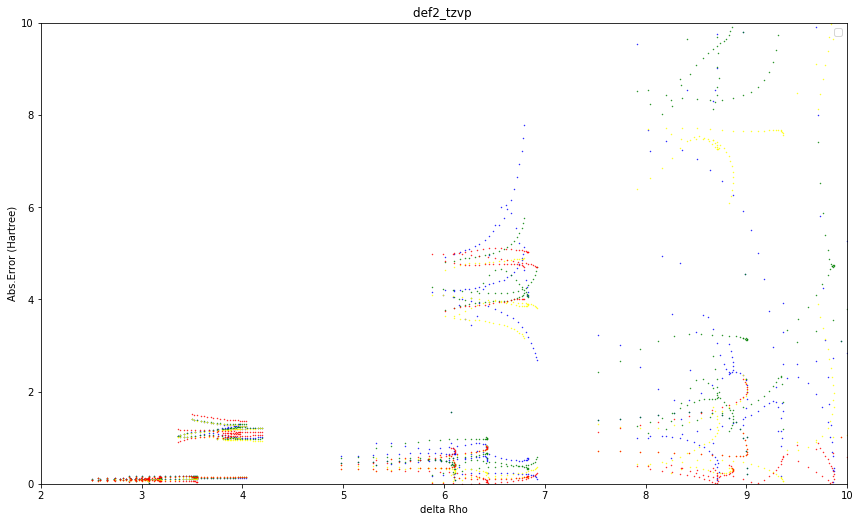

<Figure size 2520x3456 with 0 Axes>

In [46]:
fig= plt.figure(figsize=(14,8))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
ao=4
for d in points:
    for ref in molecules:
        for targ in molecules:
            if targ != ref:
                ae=float(df_def2_tzvp[(df_def2_tzvp['Reference mol.']==ref)&(df_def2_tzvp['Target mol.']==targ)&\
                            (df_def2_tzvp['Atoms distance']==d) & (df_def2_tzvp['Alchemy exp.order']== ao)]['abs.err.'])
                #print ('ae=',ae)
                if (ae<50):
                    plt.scatter(df_dRho_def2_tzvp[(df_dRho_sto3G['Reference mol.']==ref)&\
        (df_dRho_def2_tzvp['Target mol.']==targ)&(df_dRho_def2_tzvp['Atoms distance']==d)]['delta Rho'],ae,color="blue",s=.2)


ao=3
for d in points:
    for ref in molecules:
        for targ in molecules:
            if targ != ref:
                ae=float(df_def2_tzvp[(df_def2_tzvp['Reference mol.']==ref)&(df_def2_tzvp['Target mol.']==targ)&\
                            (df_def2_tzvp['Atoms distance']==d) & (df_def2_tzvp['Alchemy exp.order']== ao)]['abs.err.'])
                #print ('ae=',ae)
                if (ae<50):
                    plt.scatter(df_dRho_def2_tzvp[(df_dRho_sto3G['Reference mol.']==ref)&\
        (df_dRho_def2_tzvp['Target mol.']==targ)&(df_dRho_def2_tzvp['Atoms distance']==d)]['delta Rho'],ae,color="green",s=.2)

ao=2
for d in points:
    for ref in molecules:
        for targ in molecules:
            if targ != ref:
                ae=float(df_def2_tzvp[(df_def2_tzvp['Reference mol.']==ref)&(df_def2_tzvp['Target mol.']==targ)&\
                            (df_def2_tzvp['Atoms distance']==d) & (df_def2_tzvp['Alchemy exp.order']== ao)]['abs.err.'])
                #print ('ae=',ae)
                if (ae<50):
                    plt.scatter(df_dRho_def2_tzvp[(df_dRho_sto3G['Reference mol.']==ref)&\
        (df_dRho_def2_tzvp['Target mol.']==targ)&(df_dRho_def2_tzvp['Atoms distance']==d)]['delta Rho'],ae,color="yellow",s=.2)


ao=1
for d in points:
    for ref in molecules:
        for targ in molecules:
            if targ != ref:
                ae=float(df_def2_tzvp[(df_def2_tzvp['Reference mol.']==ref)&(df_def2_tzvp['Target mol.']==targ)&\
                            (df_def2_tzvp['Atoms distance']==d) & (df_def2_tzvp['Alchemy exp.order']== ao)]['abs.err.'])
                #print ('ae=',ae)
                if (ae<50):
                    plt.scatter(df_dRho_def2_tzvp[(df_dRho_sto3G['Reference mol.']==ref)&\
        (df_dRho_def2_tzvp['Target mol.']==targ)&(df_dRho_def2_tzvp['Atoms distance']==d)]['delta Rho'],ae,color="red",s=.2)


plt.xlim(2,10)
plt.ylim(0,10)
plt.title('def2_tzvp ' )
plt.xlabel('delta Rho')
plt.ylabel('Abs.Error (Hartree)')
plt.legend()
#plt.set_size(12,16)
plt.figure(figsize=[35,48])
plt.savefig('def2-tzvp.png')

In [47]:
df_def2_tzvp[(df_def2_qzvpp['Reference mol.']=="HeMg")&(df_def2_qzvpp['Target mol.']=="LiNa")&\
                            (df_def2_qzvpp['Atoms distance']==1.6)]

,Alchemy exp.order,Atoms distance,Basis Set,E.alch,E.ccsd,Reference mol.,Target mol.,abs.err.
715,0,1.6,def2-TZVP,-165.452419,-168.404781,HeMg,LiNa,2.952361
716,1,1.6,def2-TZVP,-167.239605,-168.404781,HeMg,LiNa,1.165176
717,2,1.6,def2-TZVP,-167.394484,-168.404781,HeMg,LiNa,1.010297
718,3,1.6,def2-TZVP,-167.380638,-168.404781,HeMg,LiNa,1.024142
719,4,1.6,def2-TZVP,-167.399169,-168.404781,HeMg,LiNa,1.005612


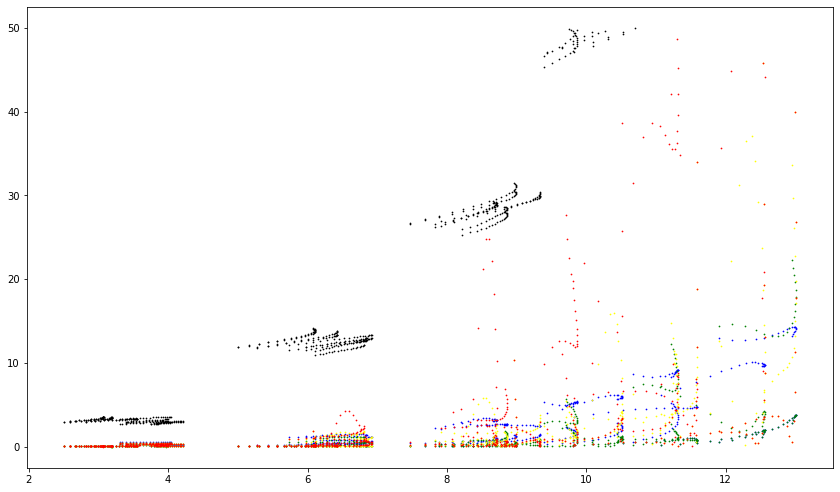

In [48]:
fig= plt.figure(figsize=(14,8))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
Colour={0:"black",1:"blue",2:"green",3:"yellow",4:"red"}
df=df_def2_qzvpp
dfR=df_dRho_def2_qzvpp
for ao in range(5):
    for d in points:
        for ref in molecules:
            for targ in molecules:
                if targ != ref:
                    ae=float(df[(df['Reference mol.']==ref)&(df['Target mol.']==targ)&\
                                (df['Atoms distance']==d) & (df['Alchemy exp.order']== ao)]['abs.err.'])
                    #print ('ae=',ae)
                    if (ae<50):
                        plt.scatter(dfR[(dfR['Reference mol.']==ref)&\
            (dfR['Target mol.']==targ)&(dfR['Atoms distance']==d)]['delta Rho'],ae,\
                                    color=Colour[ao],s=.5)



(0, 10)

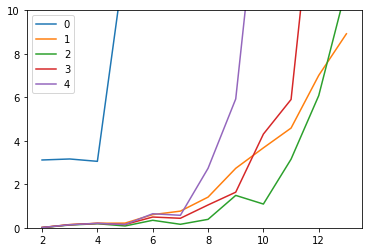

In [49]:
q = pd.merge(df_def2_qzvpp, df_dRho_def2_qzvpp)
q['drhobin'] = q['delta Rho'].astype(np.int)
for name, group in q.groupby('Alchemy exp.order'):
    subset = group.groupby('drhobin').mean().reset_index()
    plt.plot(subset.drhobin, subset['abs.err.'], label=name)
plt.legend()
plt.ylim(0, 10)

In [50]:
group.groupby('drhobin').mean().reset_index()

,drhobin,Alchemy exp.order,Atoms distance,E.alch,E.ccsd,abs.err.,delta Rho
0,2,4,1.645000,-116.743064,-116.756325,0.013260,2.810755
1,3,4,2.293182,-156.382766,-156.475401,0.140810,3.500851
2,4,4,2.941667,-202.766519,-202.907028,0.203728,4.089441
3,5,4,1.615000,-126.810271,-126.927339,0.152320,5.641035
4,6,4,2.408750,-160.100515,-160.631935,0.646598,6.464762
5,7,4,1.366667,-139.789417,-139.929023,0.575036,7.793553
6,8,4,2.258065,-158.204489,-160.079954,2.736427,8.652792
7,9,4,2.267568,-162.189890,-165.531256,5.926308,9.589832
8,10,4,2.141667,-139.050894,-156.150491,17.815371,10.479857
9,11,4,2.305405,-149.906893,-160.018679,18.941899,11.376102
